In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read file
json_file = "purchase_data.json"

purchase_data_pd = pd.read_json(json_file)
purchase_data_pd.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [3]:
# Check SN to see the value counts for each player
total_players = purchase_data_pd['SN'].value_counts()
total_players.head()

Undirrala66    5
Qarwen67       4
Saedue76       4
Hailaphos89    4
Mindimnya67    4
Name: SN, dtype: int64

In [4]:
# Identify duplicate 'SN'
purchase_data_pd.SN.duplicated().sum()

207

In [5]:
# Checks to see if there are duplicated rows
purchase_data_pd.duplicated().sum()

3

In [6]:
# These 3 rows are duplicates
purchase_data_pd.loc[purchase_data_pd.duplicated(keep='last'), :]

,Age,Gender,Item ID,Item Name,Price,SN
171,21,Male,84,Arcane Gem,2.23,Stryanastip77
226,25,Female,92,Final Critic,1.36,Chamistast30
237,7,Male,121,Massacre,3.42,Lisistaya47


In [7]:
# The duplciated rows appear later in the data set
purchase_data_pd.loc[purchase_data_pd.duplicated(), :]

,Age,Gender,Item ID,Item Name,Price,SN
292,7,Male,121,Massacre,3.42,Lisistaya47
415,25,Female,92,Final Critic,1.36,Chamistast30
440,21,Male,84,Arcane Gem,2.23,Stryanastip77


In [8]:
# Duplicate rows 
purchase_data_pd.loc[purchase_data_pd.duplicated(keep=False), :]

,Age,Gender,Item ID,Item Name,Price,SN
171,21,Male,84,Arcane Gem,2.23,Stryanastip77
226,25,Female,92,Final Critic,1.36,Chamistast30
237,7,Male,121,Massacre,3.42,Lisistaya47
292,7,Male,121,Massacre,3.42,Lisistaya47
415,25,Female,92,Final Critic,1.36,Chamistast30
440,21,Male,84,Arcane Gem,2.23,Stryanastip77


In [9]:
# Getting the shape of the original data set
purchase_data_pd.shape

(780, 6)

In [10]:
# Drop Duplicates - clean the data set to get rid of the duplicated rows
CLEAN_PURCHASE_DATA = purchase_data_pd.drop_duplicates(keep='first')
CLEAN_PURCHASE_DATA.shape

(777, 6)

In [11]:
CLEAN_PURCHASE_DATA.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [12]:
# Use in Gender Demographics?

all_players = CLEAN_PURCHASE_DATA['SN'].count()
all_players

777

** End of Data Cleaning **

In [13]:
# Use set to sort out duplicates in total_players

total_players_list = CLEAN_PURCHASE_DATA['SN']
total_players_list = list(set(total_players_list))
len(total_players_list)

total_players_count = len(total_players_list)
print("Total Players = " + str(total_players_count))

573

Total Players = 573


** Total Players Data Frame **

In [14]:
# Create a Data Frame to display Total Players 

Player_Count_df = pd.DataFrame([{'Total Players' : total_players_count}])
Player_Count_df

,Total Players
0,573


** Purchasing Analysis (Total) **

In [15]:
# Number of Unique Items
unique_items_counts = CLEAN_PURCHASE_DATA['Item Name'].value_counts()
unique_items_counts_df = pd.DataFrame(unique_items_counts)
unique_items_counts_df = unique_items_counts_df.rename(columns={"Item Name": "Item Count"})
unique_items_counts_df.head()

,Item Count
Final Critic,13
"Betrayal, Whisper of Grieving Widows",11
Stormcaller,10
Arcane Gem,10
Serenity,9


In [16]:
# Item Count
item_name_count = CLEAN_PURCHASE_DATA['Item Name'].value_counts()

# set item_name_count to a pd series
inc = pd.Series(item_name_count)

In [17]:
item_viz = pd.DataFrame(inc).head()
item_viz.reset_index(inplace=True)
item_viz_df = item_viz.rename(columns={"index":"Item","Item Name": "ItemCount"})
item_viz_df.head()                                               

,Item,ItemCount
0,Final Critic,13
1,"Betrayal, Whisper of Grieving Widows",11
2,Stormcaller,10
3,Arcane Gem,10
4,Serenity,9


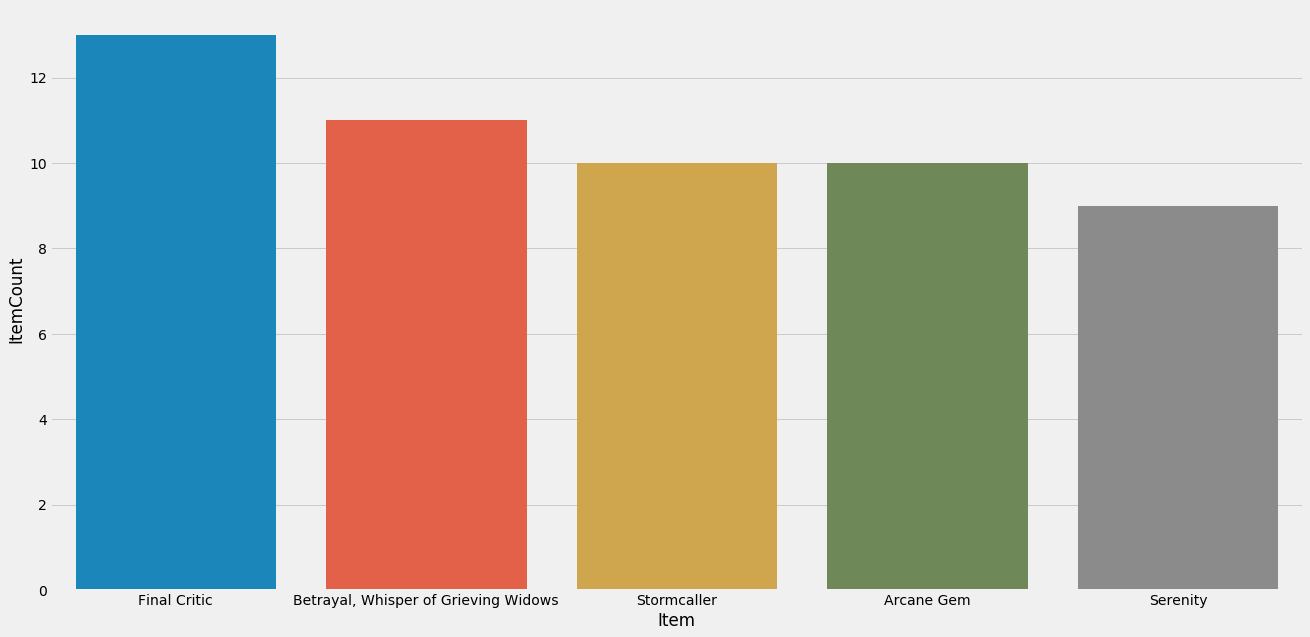

In [18]:
# Visualize unique_items_df 
plt.figure(figsize=(20,10))
sns.barplot(x="Item", y="ItemCount", data=item_viz_df)

In [19]:
# Calculate length of unique items 
Unique_Items_Length = unique_items_counts_df['Item Count'].count()
Unique_Items_Length

179

In [20]:
# Average Purchase Price
average_purchase_price = CLEAN_PURCHASE_DATA["Price"].mean()
print("Average Purchase Price = " + str(average_purchase_price))

Average Purchase Price = 2.933487773487769


In [21]:
# Total Number of Purchases
total_number_of_purchases = CLEAN_PURCHASE_DATA["Item Name"].count()
print("Total Number of Purhases = "+ str(total_number_of_purchases))

Total Number of Purhases = 777


In [22]:
# Total Revenue 
total_revenue = CLEAN_PURCHASE_DATA["Price"].sum()
total_revenue

2279.3199999999965

** Purchasing Analysis Data Frame **

In [23]:
# Create a df for Purchasing Analysis (Total)

Purchasing_Analysis_df = pd.DataFrame([{'Number of Unique Items': Unique_Items_Length,
                                       'Average Price': average_purchase_price,
                                       'Number of Purchases': total_number_of_purchases,
                                       'Total Revenue': total_revenue}])
Purchasing_Analysis_df = Purchasing_Analysis_df[['Number of Unique Items',
                                               'Average Price',
                                                 'Number of Purchases',
                                               'Total Revenue']]
Purchasing_Analysis_df = Purchasing_Analysis_df.round(2)
Purchasing_Analysis_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,2.93,777,2279.32


** Gender Demographics **

In [24]:
# Display SN & Gender Columns
SN_Gender_columns = CLEAN_PURCHASE_DATA[["SN", "Gender"]]

In [25]:
# Create new Data Frame for SN and Gender
SN_Gender_df = pd.DataFrame(SN_Gender_columns)
SN_Gender_df.head()

,SN,Gender
0,Aelalis34,Male
1,Eolo46,Male
2,Assastnya25,Male
3,Pheusrical25,Male
4,Aela59,Male


In [26]:
# Slice out Duplicates in SN_Gender_df 
# to get true value count of gender
Updated_SN_Gender_df = SN_Gender_df.drop_duplicates(['SN'], keep='last')
Updated_SN_Gender_df.head()

,SN,Gender
1,Eolo46,Male
3,Pheusrical25,Male
4,Aela59,Male
5,Tanimnya91,Male
6,Undjaskla97,Male


In [27]:
# Test to see how many rows of 'SN' are left
Updated_SN_Gender_df.shape

(573, 2)

In [28]:
# Gender Value Count
gender_value_count = Updated_SN_Gender_df["Gender"].value_counts()
gender_value_count

Male                     465
Female                   100
Other / Non-Disclosed      8
Name: Gender, dtype: int64

(<matplotlib.figure.Figure at 0x116ca7e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116c9a080>)

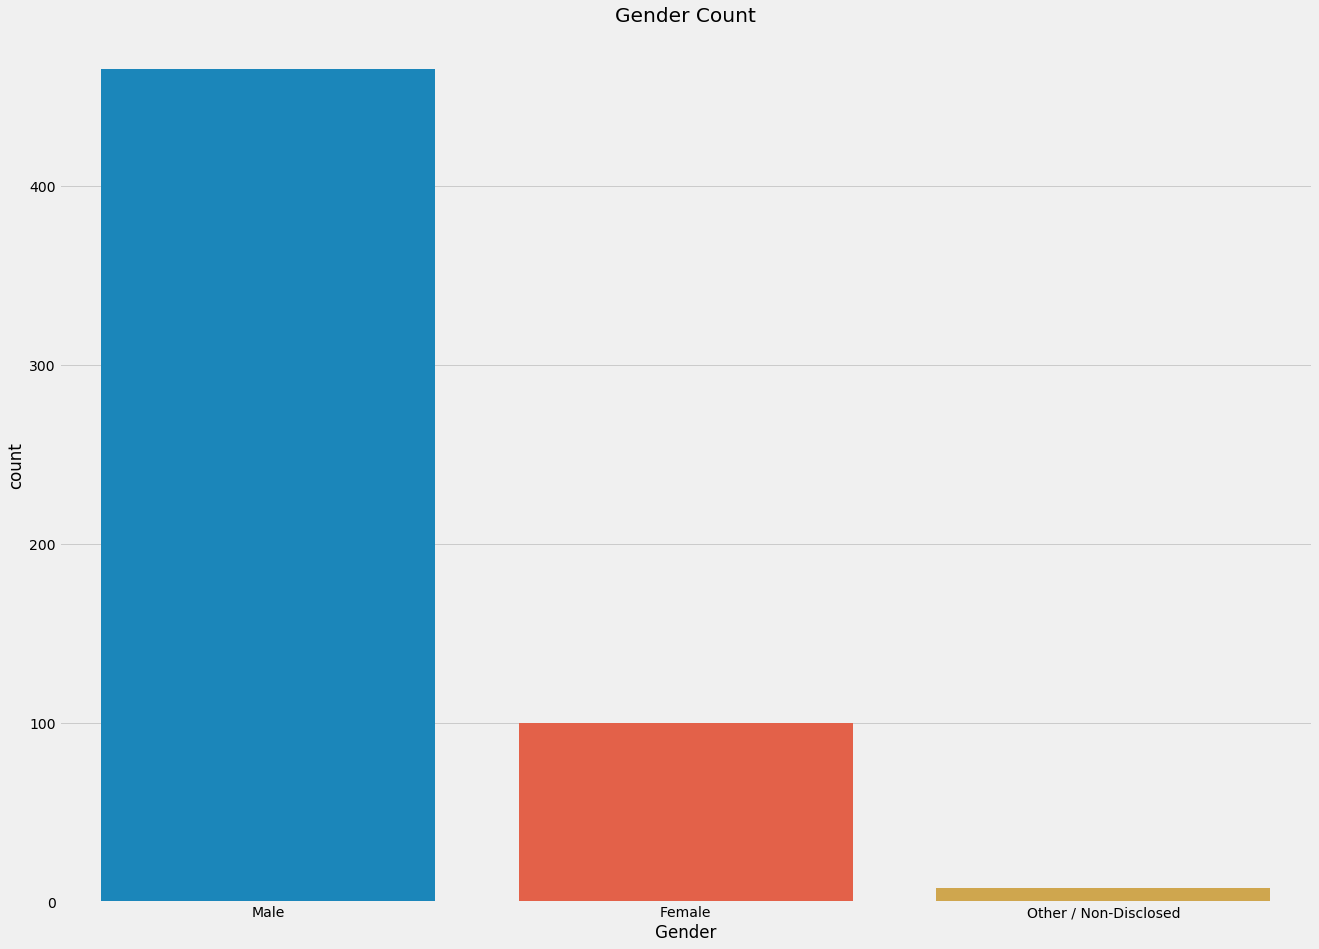

In [29]:
# plot gender count
plt.subplots(figsize=(20,15))
plt.title('Gender Count')
sns.countplot(Updated_SN_Gender_df['Gender'], label="Count")

In [30]:
# Total Gender Count
total_gender_count = Updated_SN_Gender_df["Gender"].count()
print("Total Gender Count = " + str(total_gender_count))

Total Gender Count = 573


In [31]:
# Percentage and Count of Male Players

male_count = Updated_SN_Gender_df["Gender"].value_counts()['Male']
print("Male Count = " + str(male_count))

male_count_percentage = male_count / total_gender_count * 100
print("Male Percentage Count = " + str(male_count_percentage))

Male Count = 465
Male Percentage Count = 81.1518324607


In [32]:
# Percentage and Count of Female Players

female_count = Updated_SN_Gender_df["Gender"].value_counts()['Female']
print("Female Count = " + str(female_count))

female_count_percentage = female_count / total_gender_count * 100
print("Female Percentage Count = " + str(female_count_percentage))

Female Count = 100
Female Percentage Count = 17.4520069808


In [33]:
# Percentage and Count of Other / Non-Disclosed

non_disclosed_gender_count = total_gender_count - (male_count + female_count)
print("Other / Non Disclosed Gender = " + str(non_disclosed_gender_count))

non_disclosed_gender_percentage = non_disclosed_gender_count / total_gender_count * 100
print("Non Disclosed Percentage Count = " + str(non_disclosed_gender_percentage))

Other / Non Disclosed Gender = 8
Non Disclosed Percentage Count = 1.39616055846


** Gender Demographics Data Frame **

In [34]:
# Create Gender Demographics Data Frame
# Rows = Male, Female, Other / Non Disclosed
# Columns = Percentage of Players, Total Count

Gender_Demographics_df = pd.DataFrame({'Percentage of Players':[male_count_percentage,female_count_percentage,non_disclosed_gender_count],
                                      'Total Count': [male_count, female_count,non_disclosed_gender_count]},
                                     index = ['Male', 'Female', 'Other / Non Disclosed'])

Gender_Demographics_df = Gender_Demographics_df.round(2)
Gender_Demographics_df

,Percentage of Players,Total Count
Male,81.15,465
Female,17.45,100
Other / Non Disclosed,8.00,8


In [35]:
# Purchase Count Male - using Clean Data Frame since some players
# bought multiple items
purchase_count_male = CLEAN_PURCHASE_DATA["Gender"].value_counts()["Male"]

In [36]:
# Create new DF and drop Female and Other / Non-Disclosed
Gender_purchase_pd = CLEAN_PURCHASE_DATA[["Gender","Price"]]

In [37]:
# Filter out female and update Gender_purchase_pd
Updated_Male_purchase_df = Gender_purchase_pd.query("Gender != 'Female'")

In [38]:
# Filter out Other / Non-Disclosed from Updated_Male_purchase_df
Updated_Male_purchase_df2 = Updated_Male_purchase_df.query("Gender != 'Other / Non-Disclosed'")

In [39]:
# Average Purchase Price Male
Average_Purchase_Price_Male = Updated_Male_purchase_df2['Price'].mean()

In [40]:
# Total Purchase Value Male
Total_Purchase_Value_Male = Updated_Male_purchase_df2['Price'].sum()

In [41]:
# Totals Male
print ("Purchase Count Male = " + str(purchase_count_male))
print("Average Purchase Price Male = " + str(Average_Purchase_Price_Male))
print("Total Purchase Value Male = " + str(Total_Purchase_Value_Male))

Purchase Count Male = 631
Average Purchase Price Male = 2.9509191759112494
Total Purchase Value Male = 1862.0299999999984


** Female Purchase Analysis **

In [42]:
purchase_count_female = CLEAN_PURCHASE_DATA["Gender"].value_counts()["Female"]

In [43]:
# Filter out male and update female_purchase_pd
Updated_Female_purchase_df = Gender_purchase_pd.query("Gender != 'Male'")

In [44]:
# Filter out Other / Non-Disclosed from Updated_Female_purchase_df
Updated_Female_purchase_df2 = Updated_Female_purchase_df.query("Gender != 'Other / Non-Disclosed'")
Updated_Female_purchase_df2.head()

,Gender,Price
7,Female,3.32
16,Female,1.14
17,Female,1.65
22,Female,2.52
29,Female,2.46


In [45]:
# Average Purchase Price female
Average_Purchase_Price_Female = Updated_Female_purchase_df2['Price'].mean()

In [46]:
# Total Purchase Value female
Total_Purchase_Value_Female = Updated_Female_purchase_df2['Price'].sum()

In [47]:
# Totals Female
print ("Purchase Count Female = " + str(purchase_count_female))
print("Average Purchase Price Female = " + str(Average_Purchase_Price_Female))
print("Total Purchase Value Female = " + str(Total_Purchase_Value_Female))

Purchase Count Female = 135
Average Purchase Price Female = 2.826296296296295
Total Purchase Value Female = 381.54999999999984


** Other / Non-Disclosed Purchase Analysis **

In [48]:
# Purchase Count Other / Non-Disclosed - Use orginal Data Frame since some players
# bought multiple items
purchase_count_other = CLEAN_PURCHASE_DATA["Gender"].value_counts()["Other / Non-Disclosed"]

In [49]:
# Filter out male and update purchase_count_other_pd
Updated_Other_purchase_df = Gender_purchase_pd.query("Gender != 'Male'")

In [50]:
# Filter out Female from Updated_Other_purchase_df
Updated_Other_purchase_df2 = Updated_Other_purchase_df.query("Gender != 'Female'")
Updated_Other_purchase_df2.head()

,Gender,Price
177,Other / Non-Disclosed,3.73
209,Other / Non-Disclosed,2.21
244,Other / Non-Disclosed,2.36
267,Other / Non-Disclosed,1.96
276,Other / Non-Disclosed,4.00


In [51]:
# Average Purchase Price Other 
Average_Purchase_Price_Other = Updated_Other_purchase_df2['Price'].mean()

In [52]:
# Total Purchase Value Other
Total_Purchase_Value_Other = Updated_Other_purchase_df2['Price'].sum()

In [53]:
# Totals Other
print ("Purchase Count Other / Non-Disclosed = " + str(purchase_count_other))
print("Average Purchase Price Other / Non-Disclosed = " + str(Average_Purchase_Price_Other))
print("Total Purchase Value Other / Non-Disclosed = " + str(Total_Purchase_Value_Other))

Purchase Count Other / Non-Disclosed = 11
Average Purchase Price Other / Non-Disclosed = 3.2490909090909086
Total Purchase Value Other / Non-Disclosed = 35.739999999999995


In [54]:
# Normalized Totals
Male_Norm = Total_Purchase_Value_Male / purchase_count_male 
Female_Norm = Total_Purchase_Value_Female / purchase_count_female
Other_Norm = Total_Purchase_Value_Other / purchase_count_other

** Purchasing Analysis (Gender) Data Frame **

In [55]:
# Create Purchasing Analys (Gender) Data Frame

Purchase_Analysis_df = pd.DataFrame({'Purchase Count': [purchase_count_male, purchase_count_female, purchase_count_other],
                                    'Average Purchase Price': [Average_Purchase_Price_Male, Average_Purchase_Price_Female, Average_Purchase_Price_Other],
                                    'Total Purchase Value': [Total_Purchase_Value_Male, Total_Purchase_Value_Female, Total_Purchase_Value_Other],
                                    'Normalized Totals': [Male_Norm, Female_Norm, Other_Norm]}, columns = ['Purchase Count', 'Average Purchase Price', 'Total Purchase Value','Normalized Totals'],
                                   index = ['Male', 'Female', 'Other / Non Disclosed'])
Purchase_Analysis_df = Purchase_Analysis_df.round(2)
Purchase_Analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Normalized Totals
Male,631,2.95,1862.03,2.95
Female,135,2.83,381.55,2.83
Other / Non Disclosed,11,3.25,35.74,3.25


** Age Demographics** 

* Below each are broken into bins of 4 years (i.e. <10, 10-14, 15-19,/ etc.)
    * Purchase Count
    * Average Purchase Price
    * Total Purchase Value
    * Normalized Totals

In [56]:
# Sort Data Frame into Age Demographics 
Age_Demographics_df = CLEAN_PURCHASE_DATA.loc[:,["Age", "Item Name", "Price"]]
Age_Demographics_df.head()

,Age,Item Name,Price
0,38,Bone Crushing Silver Skewer,3.37
1,21,"Stormbringer, Dark Blade of Ending Misery",2.32
2,34,Primitive Blade,2.46
3,21,Final Critic,1.36
4,23,Stormfury Mace,1.27


In [57]:
# Create Age Bins
# 0 - 10, 10 - 14, 15 - 19, 20 - 24, 25 - 29, 30 - 34, 35 - 39, 40+
bins = [0, 10, 14, 19, 24, 29, 34, 39, 50]

Age_Bin_Groups = ['Child', 'Pre Teen', 'Teen', "Early 20's", "Late 20's", "Early 30's", "Late 30's", "40+"]

In [58]:
CLEAN_PURCHASE_DATA['Age_Group'] = pd.cut(CLEAN_PURCHASE_DATA['Age'], bins, labels=Age_Bin_Groups)
CLEAN_PURCHASE_DATA.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,Late 30's
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,Early 20's
2,34,Male,174,Primitive Blade,2.46,Assastnya25,Early 30's
3,21,Male,92,Final Critic,1.36,Pheusrical25,Early 20's
4,23,Male,63,Stormfury Mace,1.27,Aela59,Early 20's


In [59]:
Age_Group_Count = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()
Age_Group_Count

Early 20's    335
Teen          133
Late 20's     124
Early 30's     64
Late 30's      42
Pre Teen       31
Child          31
40+            17
Name: Age_Group, dtype: int64

(<matplotlib.figure.Figure at 0x116cf0d30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116cc39b0>)

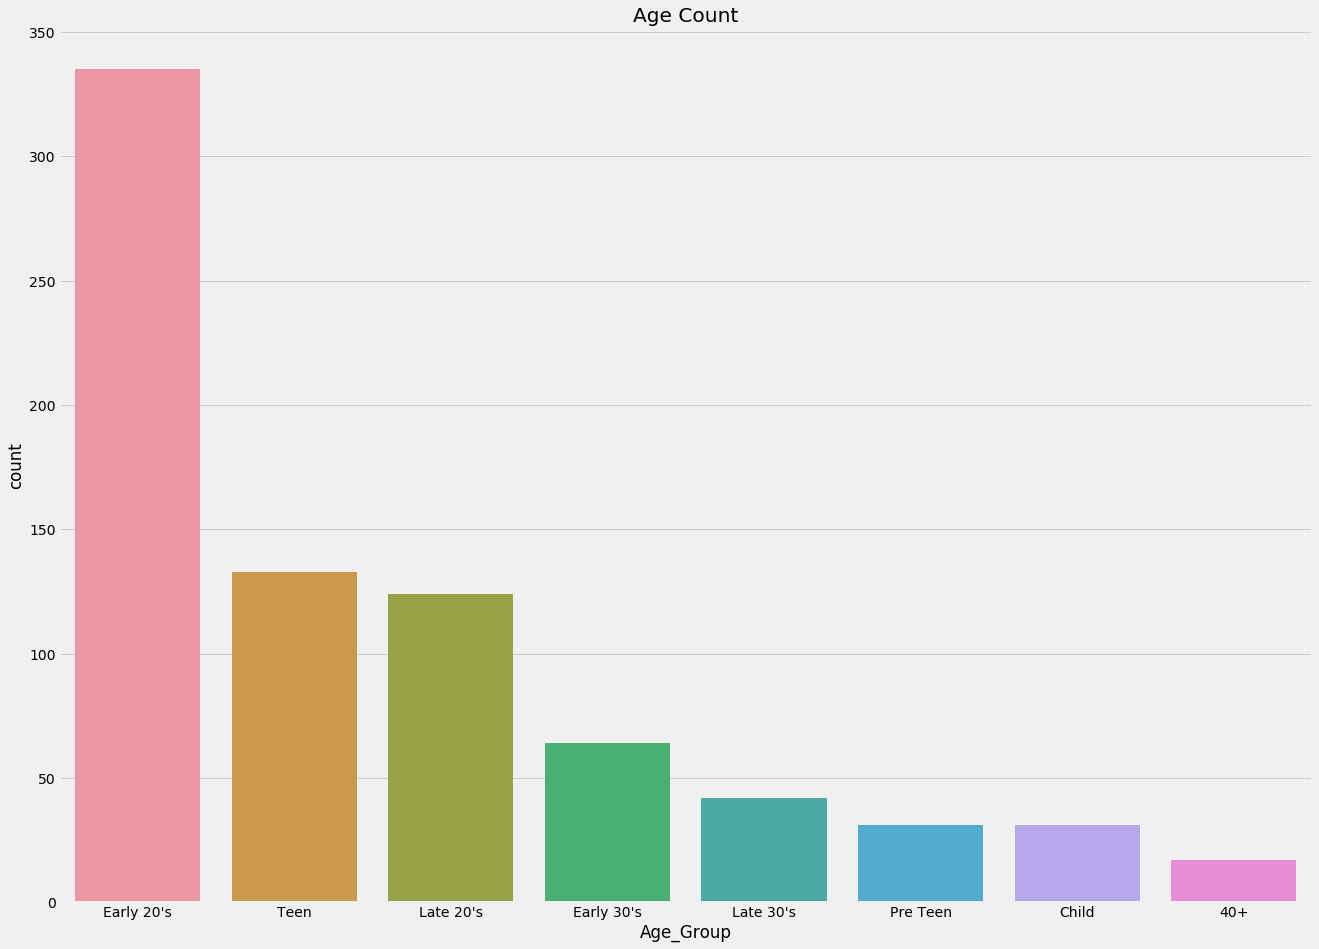

In [60]:
# plot Age Group Count
plt.subplots(figsize=(20,15))
plt.title('Age Count')
sns.countplot(x = 'Age_Group', data=CLEAN_PURCHASE_DATA,
             order=CLEAN_PURCHASE_DATA['Age_Group'].value_counts().index)

In [61]:
# Purchase_Count_Child 
Purchase_Count_Child = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["Child"]
Child_Percentage_of_Total = Purchase_Count_Child / all_players * 100 # changed to all_players (777) instead of total (573)
print('Child = ' + str(Purchase_Count_Child))
print('Child % = ' + str(Child_Percentage_of_Total))

Child = 31
Child % = 3.9897039897


In [62]:
# Purchase_Count_Pre_Teen
Purchase_Count_Pre_Teen = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["Pre Teen"]
Pre_Teen_Percentage_of_Total = Purchase_Count_Pre_Teen / all_players * 100
print('Pre Teen = ' + str(Purchase_Count_Pre_Teen))
print('Teen % = ' + str(Pre_Teen_Percentage_of_Total))

Pre Teen = 31
Teen % = 3.9897039897


In [63]:
# Purchase_Count_Teen
Purchase_Count_Teen = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["Teen"]
Teen_Percentage_of_Total = Purchase_Count_Teen / all_players * 100
print('Teen = ' + str(Purchase_Count_Teen))
print('Teen % = ' + str(Teen_Percentage_of_Total))

Teen = 133
Teen % = 17.1171171171


In [64]:
# Purchase_Count_Early20s
Purchase_Count_Early20s = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["Early 20's"]
Early20s_Percentage_of_Total = Purchase_Count_Early20s / all_players * 100
print("Early 20's = " + str(Purchase_Count_Early20s))
print("Early 20'% s = " + str(Early20s_Percentage_of_Total))

Early 20's = 335
Early 20'% s = 43.1145431145


In [65]:
# Purchase_Count_Late20s
Purchase_Count_Late20s = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["Late 20's"]
Late20s_Percentage_of_Total = Purchase_Count_Late20s / all_players * 100
print("Late 20's = " + str(Purchase_Count_Late20s))
print("Late 20's % = " + str(Late20s_Percentage_of_Total))

Late 20's = 124
Late 20's % = 15.9588159588


In [66]:
# Purchase_Count_Early30s
Purchase_Count_Early30s = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["Early 30's"]
Early30s_Percentage_of_Total = Purchase_Count_Early30s / all_players * 100
print("Early 30's = " + str(Purchase_Count_Early30s))
print("Early 30's % = " + str(Early30s_Percentage_of_Total))

Early 30's = 64
Early 30's % = 8.23680823681


In [67]:
# Purchase_Count_Late30s
Purchase_Count_Late30s = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["Late 30's"]
Late30s_Percentage_of_Total = Purchase_Count_Late30s / all_players * 100
print("Late 30's = " + str(Purchase_Count_Late30s))
print("Late 30's % = " + str(Late30s_Percentage_of_Total))

Late 30's = 42
Late 30's % = 5.40540540541


In [68]:
# Purchase_Count_40
Purchase_Count_40 = CLEAN_PURCHASE_DATA["Age_Group"].value_counts()["40+"]
Forties_Percentage_of_Total = Purchase_Count_40 / all_players * 100
print("40's = " + str(Purchase_Count_40))
print("40's % = " + str(Forties_Percentage_of_Total))

40's = 17
40's % = 2.1879021879


** Avg Purchase Price by Age Group **

In [69]:
# Avg_Price_Child
Avg_Price_Child_df = CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == 'Child']
Avg_Price_Child_df.reset_index(inplace=True)
Avg_Price_Child_df.drop('index', axis=1)
Avg_Price_Child_df.shape

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
0,7,Female,158,"Darkheart, Butcher of the Champion",3.56,Eosurdru76,Child
1,7,Male,175,Woeful Adamantite Claymore,1.24,Lassjask63,Child
2,7,Female,10,Sleepwalker,1.73,Heosurnuru52,Child
3,9,Male,71,Demise,4.07,Reulae52,Child
4,7,Male,121,Massacre,3.42,Lisistaya47,Child
5,9,Male,99,"Expiration, Warscythe Of Lost Worlds",4.53,Undjasksya56,Child
6,7,Male,77,"Piety, Guardian of Riddles",3.68,Frichjaskan98,Child
7,8,Male,79,"Alpha, Oath of Zeal",2.88,Iladarla40,Child
8,7,Male,53,Vengeance Cleaver,3.70,Yarithsurgue62,Child
9,7,Female,21,Souleater,3.27,Lisirra55,Child


(31, 8)

In [70]:
Avg_Price_Child = Avg_Price_Child_df['Price'].mean()
print("Average Price Child = " + str(Avg_Price_Child))

Average Price Child = 3.0064516129032253


In [71]:
# Avg_Price_Pre_Teen
Avg_Price_PreTeen_df =CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == 'Pre Teen']
Avg_Price_PreTeen_df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
22,11,Female,11,Brimstone,2.52,Deural48,Pre Teen
24,11,Male,65,Conqueror Adamantite Mace,1.96,Qarwen67,Pre Teen
46,11,Male,17,"Lazarus, Terror of the Earth",3.47,Palatyon26,Pre Teen
68,11,Male,38,"The Void, Vengeance of Dark Magic",2.82,Qarwen67,Pre Teen
117,11,Male,160,Azurewrath,2.22,Qarwen67,Pre Teen


In [72]:
Avg_Price_PreTeen = Avg_Price_PreTeen_df['Price'].mean()
print("Average Price Pre Teen = " + str(Avg_Price_PreTeen))

Average Price Pre Teen = 2.7029032258064514


In [73]:
# Avg_Price_Teen
Avg_Price_Teen_df = CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == 'Teen']
Avg_Price_Teen_df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
21,15,Male,3,Phantomlight,1.79,Iaralrgue74,Teen
23,19,Male,183,Dragon's Greatsword,2.36,Chanosia65,Teen
28,15,Male,49,"The Oculus, Token of Lost Worlds",4.23,Ilariarin45,Teen
29,16,Female,45,Glinting Glass Edge,2.46,Phaedai25,Teen
31,18,Male,37,"Shadow Strike, Glory of Ending Hope",1.93,Iarilis73,Teen


In [74]:
Avg_Price_Teen = Avg_Price_Teen_df['Price'].mean()
print("Average Price Teen = " + str(Avg_Price_Teen))

Average Price Teen = 2.905413533834586


In [75]:
# Avg_Early20s
Avg_Price_Early20s_df = CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == "Early 20's"]
Avg_Price_Early20s_df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46,Early 20's
3,21,Male,92,Final Critic,1.36,Pheusrical25,Early 20's
4,23,Male,63,Stormfury Mace,1.27,Aela59,Early 20's
5,20,Male,10,Sleepwalker,1.73,Tanimnya91,Early 20's
6,20,Male,153,Mercenary Sabre,4.57,Undjaskla97,Early 20's


In [76]:
Avg_Price_Early20s = Avg_Price_Early20s_df['Price'].mean()
print("Average Price Early 20's = " + str(Avg_Price_Early20s))

Average Price Early 20's = 2.9150447761194034


In [77]:
Avg_Price_Late20s_df = CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == "Late 20's"]
Avg_Price_Late20s_df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
7,29,Female,169,"Interrogator, Blood Blade of the Queen",3.32,Iathenudil29,Late 20's
8,25,Male,118,"Ghost Reaver, Longsword of Magic",2.77,Sondenasta63,Late 20's
18,28,Male,91,Celeste,3.71,Iskista88,Late 20's
26,29,Male,132,Persuasion,3.90,Aerithllora36,Late 20's
54,25,Female,101,Final Critic,4.62,Minduli80,Late 20's


In [78]:
Avg_Price_Late20s = Avg_Price_Late20s_df['Price'].mean()
print("Average Price Late 20's = " + str(Avg_Price_Late20s))

Average Price Late 20's = 2.975564516129032


In [79]:
# Avg_Early 30's Early 30's
Avg_Price_Early30s_df = CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == "Early 30's"]
Avg_Price_Early30s_df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
2,34,Male,174,Primitive Blade,2.46,Assastnya25,Early 30's
9,31,Male,99,"Expiration, Warscythe Of Lost Worlds",4.53,Hilaerin92,Early 30's
12,30,Male,81,Dreamkiss,4.06,Iskossa88,Early 30's
19,31,Male,177,"Winterthorn, Defender of Shifting Worlds",4.89,Assossa43,Early 30's
27,34,Male,106,Crying Steel Sickle,2.29,Assastnya25,Early 30's


In [80]:
Avg_Price_Early30s = Avg_Price_Early30s_df['Price'].mean()
print("Average Price Early 30's = " + str(Avg_Price_Early30s))

Average Price Early 30's = 3.082031249999999


In [81]:
Avg_Price_Late30s_df = CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == "Late 30's"]
Avg_Price_Late30s_df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34,Late 30's
81,38,Male,175,Woeful Adamantite Claymore,1.24,Yaristi64,Late 30's
106,37,Female,174,Primitive Blade,2.46,Chadossa56,Late 30's
175,35,Male,34,Retribution Axe,4.14,Raillydeu47,Late 30's
189,35,Male,179,"Wolf, Promise of the Moonwalker",1.88,Raillydeu47,Late 30's


In [82]:
Avg_Price_Late30s = Avg_Price_Late30s_df['Price'].mean()
print("Average Price Late 30's = " + str(Avg_Price_Late30s))

Average Price Late 30's = 2.842857142857143


In [83]:
# Avg_40s 
Avg_Price_40s_df = CLEAN_PURCHASE_DATA[CLEAN_PURCHASE_DATA.Age_Group == "40+"]
Avg_Price_40s_df.head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
14,40,Male,44,Bonecarvin Battle Axe,2.46,Sundast29,40+
179,40,Male,70,Hope's End,3.89,Chanosiaya39,40+
186,40,Male,144,Blood Infused Guardian,2.86,Chanosiaya39,40+
212,40,Male,111,Misery's End,2.91,Yarmol79,40+
238,40,Female,49,"The Oculus, Token of Lost Worlds",4.23,Chamadar27,40+


In [84]:
Avg_Price_40s = Avg_Price_40s_df['Price'].mean()
print("Average Price 40's = " + str(Avg_Price_40s))

Average Price 40's = 3.161764705882353


** Age Demographics Data Frame **

In [85]:
# Create Age Demographics Data Frame

Age_Demo_df = pd.DataFrame({'Percentage of Players': [Child_Percentage_of_Total, Pre_Teen_Percentage_of_Total,
                                                      Teen_Percentage_of_Total, Early20s_Percentage_of_Total,
                                                     Late20s_Percentage_of_Total, Early30s_Percentage_of_Total,
                                                     Late30s_Percentage_of_Total, Forties_Percentage_of_Total],
                                    'Total Count': [Purchase_Count_Child, Purchase_Count_Pre_Teen, Purchase_Count_Teen,
                                                    Purchase_Count_Early20s, Purchase_Count_Late20s, Purchase_Count_Early30s,
                                                    Purchase_Count_Late30s,Purchase_Count_40]},
                                    columns = ['Percentage of Players', 'Total Count'],
                                   index = ['Child', 'Pre Teen', 'Teen', "Early 20's", "Late 20's", "Early 30's", "Late 30's", "40+"])
Age_Demo_df = Age_Demo_df.round(2)
Age_Demo_df

,Percentage of Players,Total Count
Child,3.99,31
Pre Teen,3.99,31
Teen,17.12,133
Early 20's,43.11,335
Late 20's,15.96,124
Early 30's,8.24,64
Late 30's,5.41,42
40+,2.19,17


In [86]:
# Total Purchase Value Child
Total_Purchase_Value_Child = Avg_Price_Child_df['Price'].sum()
print("Total Purchase Value Child = " + str(Total_Purchase_Value_Child))

Total Purchase Value Child = 93.19999999999999


In [87]:
# Total Purchase Value Pre Teen
Total_Purchase_Value_PreTeen = Avg_Price_PreTeen_df['Price'].sum()
print("Total Purchase Value Pre Teen = " + str(Total_Purchase_Value_PreTeen))

Total Purchase Value Pre Teen = 83.78999999999999


In [88]:
# Total Purchase Value Teen
Total_Purchase_Value_Teen = Avg_Price_Teen_df['Price'].sum()
print("Total Purchase Teen = " + str(Total_Purchase_Value_Teen))

Total Purchase Teen = 386.41999999999996


In [89]:
# Total Purchase Value Early 20's
Total_Purchase_Value_Early20s = Avg_Price_Early20s_df['Price'].sum()
print("Total Purchase Value Early 20's = " + str(Total_Purchase_Value_Early20s))

Total Purchase Value Early 20's = 976.5400000000001


In [90]:
# Total Purchase Avg_Price_Late20s
Total_Purchase_Value_Late20s = Avg_Price_Late20s_df['Price'].sum()
print("Total Purchase Value Late 20s = " + str(Total_Purchase_Value_Late20s))

Total Purchase Value Late 20s = 368.96999999999997


In [91]:
# Total Purchase Avg Early 30s
Total_Purchase_Value_Early30s = Avg_Price_Early30s_df['Price'].sum()
print("Total Purchase Value Early 30s = " + str(Total_Purchase_Value_Early30s))

Total Purchase Value Early 30s = 197.24999999999994


In [92]:
# Total Purchase Ave Late 30s
Total_Purchase_Value_Late30s = Avg_Price_Late30s_df['Price'].sum()
print("Total Purchase Value Late 30s = " + str(Total_Purchase_Value_Late30s))

Total Purchase Value Late 30s = 119.4


In [93]:
# Total Purchase Ave 40+
Total_Purchase_Value_40s = Avg_Price_40s_df['Price'].sum()
print("Total Purchase Value 40s = " + str(Total_Purchase_Value_40s))

Total Purchase Value 40s = 53.75


** Purchasing Analysis Age **

In [94]:
Purchase_Analysis_df = pd.DataFrame({'Purchase Count': [Purchase_Count_Child, Purchase_Count_Pre_Teen, Purchase_Count_Teen,
                                                    Purchase_Count_Early20s, Purchase_Count_Late20s, Purchase_Count_Early30s,
                                                    Purchase_Count_Late30s, Purchase_Count_40],
                                    'Average Purchase Price': [Avg_Price_Child, Avg_Price_PreTeen, Avg_Price_Teen, Avg_Price_Early20s, Avg_Price_Late20s, 
                                                               Avg_Price_Early30s, Avg_Price_Late30s, Avg_Price_40s],
                                    'Total Purchase Value': [Total_Purchase_Value_Child, Total_Purchase_Value_PreTeen, Total_Purchase_Value_Teen, 
                                                             Total_Purchase_Value_Early20s, Total_Purchase_Value_Late20s, Total_Purchase_Value_Early30s, 
                                                             Total_Purchase_Value_Late30s, Total_Purchase_Value_40s]},
                                    columns = ['Purchase Count', 'Average Purchase Price', 'Total Purchase Value'],
                                   index = ['Child', 'Pre Teen', 'Teen', "Early 20's", "Late 20's", "Early 30's", "Late 30's", "40+"])
Purchase_Analysis_df = Purchase_Analysis_df.round(2)
Purchase_Analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value
Child,31,3.01,93.20
Pre Teen,31,2.70,83.79
Teen,133,2.91,386.42
Early 20's,335,2.92,976.54
Late 20's,124,2.98,368.97
Early 30's,64,3.08,197.25
Late 30's,42,2.84,119.40
40+,17,3.16,53.75


** Top Spenders **

* Identify the the top 5 spenders in the game by total purchase value, then list (in a table):
    * SN
    * Purchase Count
    * Average Purchase Price
    * Total Purchase Value

In [95]:
# Create groupby for 'SN' and 'Price' to find top 5

Top_5_Spenders= pd.DataFrame(CLEAN_PURCHASE_DATA.groupby('SN')['Price'].sum())
Top_5_Spenders.reset_index(inplace=True)
Top_5_Spenders = Top_5_Spenders.sort_values(['Price'],ascending=False)
Top_5_Spenders.head()

,SN,Price
538,Undirrala66,17.06
428,Saedue76,13.56
354,Mindimnya67,12.74
181,Haellysu29,12.73
120,Eoda93,11.58


In [96]:
# Find Count of 'Price' on 'SN'
Top_5_Count = pd.DataFrame(CLEAN_PURCHASE_DATA.groupby('SN')['Price'].count())
Top_5_Count.reset_index(inplace=True)
Top_5_Count = Top_5_Count.sort_values(['Price'],ascending=False)
Top_5_Count.head()

,SN,Price
538,Undirrala66,5
184,Hailaphos89,4
385,Qarwen67,4
354,Mindimnya67,4
467,Sondastan54,4


In [97]:
# Find Avg 'Price' on 'SN'
Top_5_Avg = pd.DataFrame(CLEAN_PURCHASE_DATA.groupby('SN')['Price'].mean())
Top_5_Avg.reset_index(inplace=True)
Top_5_Avg = Top_5_Avg.sort_values(['Price'], ascending=False)
Top_5_Avg.head()

,SN,Price
388,Qiluard68,4.95
517,Tyarithn67,4.95
364,Palurrian69,4.95
168,Frichaststa61,4.95
67,Assossa43,4.89


In [98]:
# Merge tables
Top_5_Merge = pd.merge(Top_5_Spenders, Top_5_Count, on = 'SN')
Top_5_Merge.head()

,SN,Price_x,Price_y
0,Undirrala66,17.06,5
1,Saedue76,13.56,4
2,Mindimnya67,12.74,4
3,Haellysu29,12.73,3
4,Eoda93,11.58,3


In [99]:
# Merge Avg Price with newly merged table
Top_5_Merge_Updated = pd.merge(Top_5_Merge, Top_5_Avg, on = 'SN')
Top_5_Merge_Updated.head()

,SN,Price_x,Price_y,Price
0,Undirrala66,17.06,5,3.412000
1,Saedue76,13.56,4,3.390000
2,Mindimnya67,12.74,4,3.185000
3,Haellysu29,12.73,3,4.243333
4,Eoda93,11.58,3,3.860000


In [100]:
# Fix Column names -----------------------

Top_5_Final = Top_5_Merge_Updated.rename(columns={'SN':'SN',
                                  'Price_x':'Total_Purchase_Value',
                                   'Price_y': 'Purhcase_Count',
                                   'Price': 'Avg_Purchase_Price'})
Top_5_Final = Top_5_Final[['SN',
                          'Purhcase_Count',
                          'Avg_Purchase_Price',
                          'Total_Purchase_Value']]
Top_5_Final = Top_5_Final.round(2)

** Top Spenders Data Frame**

In [101]:
Top_5_Final.set_index('SN').head()

,Purhcase_Count,Avg_Purchase_Price,Total_Purchase_Value
SN,,,
Undirrala66,5,3.41,17.06
Saedue76,4,3.39,13.56
Mindimnya67,4,3.18,12.74
Haellysu29,3,4.24,12.73
Eoda93,3,3.86,11.58


** Most Popular Items **

* Identify the 5 most popular items by purchase count, then list (in a table):
    * Item ID
    * Item Name
    * Purchase Count
    * Item Price
    * Total Purchase Value

** Popular Items **

In [102]:
# Create Data Frame for "Item Name" to get purchase count
Item_count = pd.DataFrame(CLEAN_PURCHASE_DATA['Item Name'].value_counts())
Item_count.reset_index(inplace=True)
Item_count.columns = ['Item Name', 'Purchase_Count']
Item_count = Item_count.sort_values(['Purchase_Count'],ascending=False)
Item_count.head()

,Item Name,Purchase_Count
0,Final Critic,13
1,"Betrayal, Whisper of Grieving Widows",11
2,Stormcaller,10
3,Arcane Gem,10
4,Serenity,9


In [103]:
# Item Name and Price Sum
Most_Popular_Name_sum = pd.DataFrame(CLEAN_PURCHASE_DATA.groupby('Item Name')['Price'].sum())
Most_Popular_Name_sum.reset_index(inplace=True)
Most_Popular_Name_sum = Most_Popular_Name_sum.sort_values(['Price'], ascending=False)
Most_Popular_Name_sum.head()

,Item Name,Price
112,Retribution Axe,37.26
56,Final Critic,37.24
137,Stormcaller,34.65
132,Spectral Diamond Doomblade,29.75
96,Orenmir,29.70


In [104]:
# Item Name and Price Count
Most_Popular_Name_count = pd.DataFrame(CLEAN_PURCHASE_DATA.groupby('Item Name')['Price'].count())
Most_Popular_Name_count.reset_index(inplace=True)
Most_Popular_Name_count = Most_Popular_Name_count.sort_values(['Price'], ascending=False)
Most_Popular_Name_count.head()

,Item Name,Price
56,Final Critic,13
11,"Betrayal, Whisper of Grieving Widows",11
8,Arcane Gem,10
137,Stormcaller,10
173,Woeful Adamantite Claymore,9


In [105]:
# Merge Item Name Price Sum and Count
Most_Popular_Name_Merge = pd.merge(Most_Popular_Name_sum, Most_Popular_Name_count, on = 'Item Name')

In [106]:
# Fix Column names -----------------------

Most_Popular_Name_Merge = Most_Popular_Name_Merge.rename(columns={'Item Name':'Item Name',
                                  'Price_x':'Total_Purchase_Value',
                                   'Price_y': 'Purchase_Count'})
Most_Popular_Name_Merge = Most_Popular_Name_Merge[['Item Name',
                          'Purchase_Count',
                          'Total_Purchase_Value']]
Most_Popular_Name_Merge = Most_Popular_Name_Merge.round(2)
Most_Popular_Name_Merge.head()

,Item Name,Purchase_Count,Total_Purchase_Value
0,Retribution Axe,9,37.26
1,Final Critic,13,37.24
2,Stormcaller,10,34.65
3,Spectral Diamond Doomblade,7,29.75
4,Orenmir,6,29.70


** Most popular items listed by Item ID, Total Purchase Value & Purchase Count **

In [107]:
# Item ID and Price Sum
Most_Popular_ID_sum = pd.DataFrame(CLEAN_PURCHASE_DATA.groupby('Item ID')['Price'].sum())
Most_Popular_ID_sum.reset_index(inplace=True)
Most_Popular_ID_sum = Most_Popular_ID_sum.sort_values(['Price'], ascending=False)
Most_Popular_ID_sum.head()

,Item ID,Price
34,34,37.26
115,115,29.75
32,32,29.70
103,103,29.22
107,107,28.88


In [108]:
# Item ID and Price Count 
Most_Popular_ID_count = pd.DataFrame(CLEAN_PURCHASE_DATA.groupby('Item ID')['Price'].count())
Most_Popular_ID_count.reset_index(inplace=True)
Most_Popular_ID_count = Most_Popular_ID_count.sort_values(['Price'], ascending=False)
Most_Popular_ID_count.head()

,Item ID,Price
39,39,11
84,84,10
31,31,9
174,175,9
13,13,9


In [109]:
# Merge Item ID Price Sum and Count
Most_Popular_ID_Merge = pd.merge(Most_Popular_ID_sum, Most_Popular_ID_count, on = 'Item ID')

In [110]:
# Fix Column names -----------------------

Most_Popular_ID_Merge = Most_Popular_ID_Merge.rename(columns={'Item ID':'Item ID',
                                  'Price_x':'Total_Purchase_Value',
                                   'Price_y': 'Purchase_Count'})
Most_Popular_ID_Merge = Most_Popular_ID_Merge[['Item ID',
                          'Purchase_Count',
                          'Total_Purchase_Value']]
Most_Popular_ID_Merge = Most_Popular_ID_Merge.round(2)
Most_Popular_ID_Merge.head()

,Item ID,Purchase_Count,Total_Purchase_Value
0,34,9,37.26
1,115,7,29.75
2,32,6,29.70
3,103,6,29.22
4,107,8,28.88


In [111]:
# Create new DF with Item ID, Item Name and Price

Item_ID_Name_Price = pd.DataFrame(CLEAN_PURCHASE_DATA[['Item ID',
                                                      'Item Name',
                                                      'Price']])

In [112]:
# Merge with Most Popular ID Merge

Item_ID_Name_Price_Merge = pd.merge(Item_ID_Name_Price,
                                    Most_Popular_ID_Merge, on = "Item ID")
Item_ID_Name_Price_Merge = Item_ID_Name_Price_Merge.sort_values(['Purchase_Count'], ascending=False)
Item_ID_Name_Price_Merge.head()

,Item ID,Item Name,Price,Purchase_Count,Total_Purchase_Value
262,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85
261,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85
260,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85
259,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85
264,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85


In [113]:
# Drop Duplicates in Item_ID_Name_Price_Merge
ItemID_NamePrice_CLEAN = Item_ID_Name_Price_Merge.drop_duplicates()
ItemID_NamePrice_CLEAN.head()

,Item ID,Item Name,Price,Purchase_Count,Total_Purchase_Value
262,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85
434,84,Arcane Gem,2.23,10,22.30
337,175,Woeful Adamantite Claymore,1.24,9,11.16
159,13,Serenity,1.49,9,13.41
236,31,Trickster,2.07,9,18.63


** Most Profitable Items **

* Identify the 5 most profitable items by total purchase value, then list (in a table):
    * Item ID
    * Item Name
    * Purchase Count
    * Item Price
    * Total Purchase Value
    
** Most Profitable Items Data Frame**

In [114]:
ItemID_NamePrice_CLEAN = ItemID_NamePrice_CLEAN.sort_values(['Total_Purchase_Value'], ascending=False)
ItemID_NamePrice_CLEAN.head()

,Item ID,Item Name,Price,Purchase_Count,Total_Purchase_Value
253,34,Retribution Axe,4.14,9,37.26
416,115,Spectral Diamond Doomblade,4.25,7,29.75
217,32,Orenmir,4.95,6,29.70
389,103,Singed Scalpel,4.87,6,29.22
529,107,"Splitter, Foe Of Subtlety",3.61,8,28.88
